In [1]:
import pandas as pd
import numpy as np
import re
import os
from src.evaluation import Evaluator, compilerPatterns, ResultsFromMeanStdDF
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 12})

In [2]:
## This cell would need for testing phase - Ignore this
%load_ext autoreload
%autoreload 2

In [12]:
paths = [ os.path.join(dataset.name, experiment.name) 
         for dataset in os.scandir('experiments') if dataset.is_dir() and 'chembl' in dataset.name 
         for experiment in os.scandir(dataset.path)  ]

In [13]:
paths

['chemblAug5_SELFIES-RNN/2hl_256hu_512bs_0.001lr',
 'chemblAug5_SELFIES-RNN/2hl_512hu_256bs_0.001lr',
 'chemblAug5_SELFIES-RNN/2hl_512hu_512bs_0.001lr',
 'chemblAug5_SELFIES-RNN/3hl_256hu_256bs_0.001lr',
 'chemblAug5_SELFIES-RNN/2hl_256hu_256bs_0.001lr',
 'chemblAug5_SELFIES-RNN/3hl_256hu_512bs_0.001lr',
 'chemblAug5_SELFIES-RNN/3hl_512hu_256bs_0.001lr',
 'chemblAug5_SELFIES-RNN/3hl_512hu_512bs_0.001lr',
 'chemblAug5_SMILES-RNN/2hl_256hu_512bs_0.001lr',
 'chemblAug5_SMILES-RNN/2hl_512hu_256bs_0.001lr',
 'chemblAug5_SMILES-RNN/2hl_512hu_512bs_0.001lr',
 'chemblAug5_SMILES-RNN/3hl_256hu_256bs_0.001lr',
 'chemblAug5_SMILES-RNN/2hl_256hu_256bs_0.001lr',
 'chemblAug5_SMILES-RNN/3hl_256hu_512bs_0.001lr',
 'chemblAug5_SMILES-RNN/3hl_512hu_256bs_0.001lr',
 'chemblAug5_SMILES-RNN/3hl_512hu_512bs_0.001lr',
 'chemblAug5_fragSMILES-RNN/2hl_256hu_512bs_300es_0.001lr',
 'chemblAug5_fragSMILES-RNN/2hl_512hu_256bs_300es_0.001lr',
 'chemblAug5_fragSMILES-RNN/2hl_512hu_512bs_300es_0.001lr',
 'chemblAug5

In [14]:
evaluators = [Evaluator(path) for path in paths]

In [15]:
evaluators_table = pd.concat([evaluator.get_as_DFcell() for evaluator in evaluators ], ignore_index=True, axis=0)

In [16]:
evaluators_table = evaluators_table.drop(columns=['dataset','notation']).groupby(['aug','hl','hu','bs','lr',]).agg(lambda x: x.dropna())

In [17]:
evaluators_table

SELFIES  \
aug hl hu  bs  lr                                                         
1   2  256 256 0.001  <src.evaluation.Evaluator object at 0x7fd78fdd...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78fdd...   
       512 256 0.001  <src.evaluation.Evaluator object at 0x7fd78fdd...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78fdd...   
    3  256 256 0.001  <src.evaluation.Evaluator object at 0x7fd78fdd...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78fdd...   
       512 256 0.001  <src.evaluation.Evaluator object at 0x7fd78fdd...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78fe2...   
5   2  256 256 0.001  <src.evaluation.Evaluator object at 0x7fd78ffc...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78ff1...   
       512 256 0.001  <src.evaluation.Evaluator object at 0x7fd78ff5...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78ff8...   
    3  256 256 0.001  <src.evaluation.Evaluator object at 0x7fd78ff8...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78ff6...   
       512 256 0.001  <src.evaluation.Evaluator object at 0x7fd78ff6...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78ff6...   

                                                                 SMILES  \
aug hl hu  bs  lr                                                         
1   2  256 256 0.001  <src.evaluation.Evaluator object at 0x7fd78fe2...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78fe2...   
       512 256 0.001  <src.evaluation.Evaluator object at 0x7fd78fe2...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78fe2...   
    3  256 256 0.001  <src.evaluation.Evaluator object at 0x7fd78fe2...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78fe2...   
       512 256 0.001  <src.evaluation.Evaluator object at 0x7fd78fe2...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78fe2...   
5   2  256 256 0.001  <src.evaluation.Evaluator object at 0x7fd78ff6...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78ff6...   
       512 256 0.001  <src.evaluation.Evaluator object at 0x7fd78ff6...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78ff6...   
    3  256 256 0.001  <src.evaluation.Evaluator object at 0x7fd78ff6...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78ff6...   
       512 256 0.001  <src.evaluation.Evaluator object at 0x7fd78fe2...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78ff1...   

                                                             fragSMILES  \
aug hl hu  bs  lr                                                         
1   2  256 256 0.001  <src.evaluation.Evaluator object at 0x7fd78fe3...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78fe2...   
       512 256 0.001  <src.evaluation.Evaluator object at 0x7fd78fe2...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78fe2...   
    3  256 256 0.001  <src.evaluation.Evaluator object at 0x7fd78ff1...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78fe3...   
       512 256 0.001  <src.evaluation.Evaluator object at 0x7fd78ff0...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd79018...   
5   2  256 256 0.001  <src.evaluation.Evaluator object at 0x7fd78fdd...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78fdd...   
       512 256 0.001  <src.evaluation.Evaluator object at 0x7fd78fdd...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78fdd...   
    3  256 256 0.001  <src.evaluation.Evaluator object at 0x7fd78fdd...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78fdd...   
       512 256 0.001  <src.evaluation.Evaluator object at 0x7fd78fdd...   
           512 0.001  <src.evaluation.Evaluator object at 0x7fd78fdd...   

           

In [9]:
evaluators_table.map(lambda x: x.load_logs())

AttributeError: 'numpy.ndarray' object has no attribute 'load_logs'

In [9]:
evaluators_table.map(lambda x: x.load_samples())

SELFIES  SMILES  fragSMILES  t-SMILES
aug hl hu  bs  lr                                          
1   2  256 256 0.001     True    True        True      True
           512 0.001     True    True        True      True
       512 256 0.001     True    True        True      True
           512 0.001     True    True        True      True
    3  256 256 0.001     True    True        True      True
           512 0.001     True    True        True      True
       512 256 0.001     True    True        True      True
           512 0.001     True    True        True      True
5   2  256 256 0.001     True    True        True      True
           512 0.001     True    True        True      True
       512 256 0.001     True    True        True      True
           512 0.001     True    True        True      True
    3  256 256 0.001     True    True        True      True
           512 0.001     True    True        True      True
       512 256 0.001     True    True        True      True
           512 0.001     True    True        True      True

## loss

In [18]:
ev_atom = evaluators_table.iloc[3,-1]

In [19]:
ev_atom.load_logs()

True

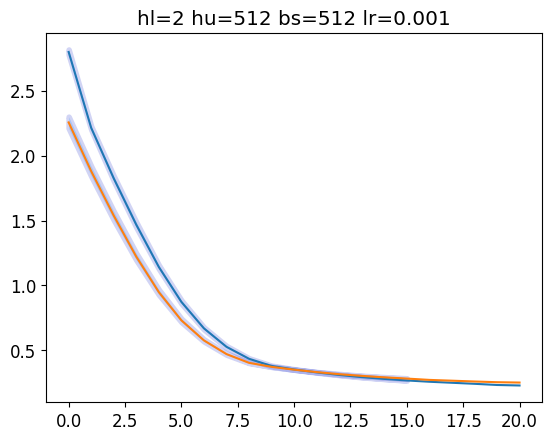

In [20]:
ev_atom.plot_logs(plt.gca())

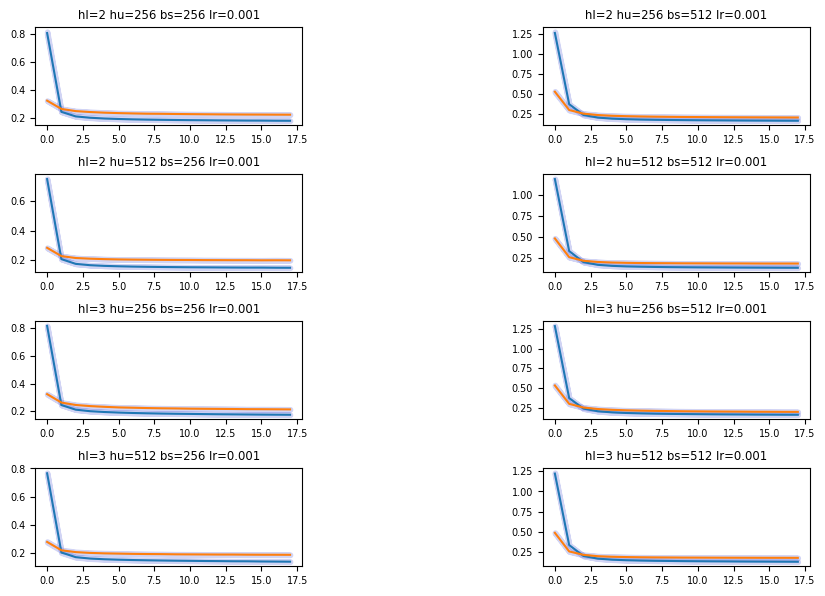

In [26]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 7})

fig,axes = plt.subplots(nrows=4, ncols=2, figsize=(10,7),gridspec_kw={'wspace':0.9, 'hspace':0.5})
for evaluator, ax in zip(evaluators_table['chemblAug5_t-SMILES-RNN'], axes.flatten()):
    evaluator.plot_logs(ax)

## Syntax metrics

In [18]:
from scipy import stats

In [12]:
genDFs=pd.concat( [evaluator.getResultsGens() for evaluator in evaluators if evaluator.samples is not None], ignore_index=True )

In [13]:
genDFs['valid%']=genDFs['valid']/genDFs['amount']
genDFs['unique%']=genDFs['unique']/genDFs['valid']
genDFs['novel%']=genDFs['novel']/genDFs['unique']

In [15]:
genDFs

,fold,amount,epoch,T,valid,unique,novel,dataset,aug,notation,hl,hu,bs,lr,valid%,unique%,novel%
0,0,6000,3,1.0,6000,5998,5998,chembl,5,SELFIES,2,256,512,0.001,1.000000,0.999667,1.000000
1,1,6000,3,1.0,6000,6000,6000,chembl,5,SELFIES,2,256,512,0.001,1.000000,1.000000,1.000000
2,2,6000,3,1.0,6000,6000,6000,chembl,5,SELFIES,2,256,512,0.001,1.000000,1.000000,1.000000
3,3,6000,3,1.0,5999,5997,5997,chembl,5,SELFIES,2,256,512,0.001,0.999833,0.999667,1.000000
4,4,6000,3,1.0,6000,5998,5998,chembl,5,SELFIES,2,256,512,0.001,1.000000,0.999667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0,6000,10,1.0,6000,5899,5871,chembl,1,t-SMILES,3,512,512,0.001,1.000000,0.983167,0.995253
317,1,6000,10,1.0,6000,5918,5886,chembl,1,t-SMILES,3,512,512,0.001,1.000000,0.986333,0.994593
318,2,6000,10,1.0,6000,5888,5872,chembl,1,t-SMILES,3,512,512,0.001,1.000000,0.981333,0.997283
319,3,6000,10,1.0,6000,5893,5872,chembl,1,t-SMILES,3,512,512,0.001,1.000000,0.982167,0.996436


In [12]:
drop_cols = ['fold','epoch','T','amount','dataset']
group_cols = ['aug','notation','hl','hu','bs','lr']

In [17]:
genGrp=genDFs.drop(columns=drop_cols)\
                .groupby(group_cols,as_index=True, dropna=False)

In [19]:
genStats=genGrp.describe().loc(axis=1)[ ( slice(None),['mean','std'] ) ]

In [28]:
genStats.to_csv('results/07_chemblSyntax.csv')

In [21]:
ResultsFromMeanStdDF(genStats.query(' (aug==5 and hl==2 and hu==512 and bs==256 ) or (aug==1 and hl==2 and hu==512 and bs==512 ) '))

valid         unique          novel  \
aug notation   hl hu  bs  lr                                                   
1   SELFIES    2  512 512 0.001   6000.0 ± 0.0   5999.0 ± 2.0   5971.0 ± 2.0   
    SMILES     2  512 512 0.001  4930.0 ± 70.0  4920.0 ± 70.0  4770.0 ± 60.0   
    fragSMILES 2  512 512 0.001  5280.0 ± 20.0  5270.0 ± 30.0  5110.0 ± 40.0   
    t-SMILES   2  512 512 0.001   6000.0 ± 0.0  5880.0 ± 10.0  5860.0 ± 10.0   
5   SELFIES    2  512 256 0.001   6000.0 ± 0.0   6000.0 ± 0.0   5997.0 ± 1.0   
    SMILES     2  512 256 0.001  5300.0 ± 40.0  5300.0 ± 40.0  5280.0 ± 40.0   
    fragSMILES 2  512 256 0.001  5420.0 ± 60.0  5410.0 ± 60.0  5300.0 ± 60.0   
    t-SMILES   2  512 256 0.001   6000.0 ± 0.0  5930.0 ± 10.0  5880.0 ± 10.0   

                                        valid%          unique%  \
aug notation   hl hu  bs  lr                                      
1   SELFIES    2  512 512 0.001      1.0 ± 0.0  0.9998 ± 0.0003   
    SMILES     2  512 512 0.001    0.82 ± 0.01    0.997 ± 0.001   
    fragSMILES 2  512 512 0.001   0.88 ± 0.004  0.9976 ± 0.0005   
    t-SMILES   2  512 512 0.001      1.0 ± 0.0     0.98 ± 0.002   
5   SELFIES    2  512 256 0.001      1.0 ± 0.0        1.0 ± 0.0   
    SMILES     2  512 256 0.001  0.883 ± 0.007  0.9999 ± 0.0002   
    fragSMILES 2  512 256 0.001  0.903 ± 0.009  0.9991 ± 0.0006   
    t-SMILES   2  512 256 0.001      1.0 ± 0.0    0.988 ± 0.002   

                                          novel%  
aug notation   hl hu  bs  lr                      
1   SELFIES    2  512 512 0.001  0.9953 ± 0.0006  
    SMILES     2  512 512 0.001     0.97 ± 0.002  
    fragSMILES 2  512 512 0.001    0.971 ± 0.004  
    t-SMILES   2  512 512 0.001  0.9957 ± 0.0005  
5   SELFIES    2  512 256 0.001  0.9996 ± 0.0002  
    SMILES     2  512 256 0.001   0.997 ± 0.0009  
    fragSMILES 2  512 256 0.001     0.98 ± 0.003  
    t-SMILES   2  512 256 0.001  0.9929 ± 0.0005

In [27]:
params=[2,512,512,0.001]
params5=[2,512,256,0.001]

In [24]:
genPvals = pd.DataFrame.from_dict(
                {notation+'x1': 
                {metric:stats.ttest_ind(
                genGrp.get_group((1,notation,*params))[metric],
                genGrp.get_group((1,'fragSMILES',*params))[metric],
                ).pvalue for metric in genStats.columns.get_level_values(0)} for notation in ['SMILES','SELFIES','t-SMILES']
                } |
                {notation+'x5': 
                {metric:stats.ttest_ind(
                genGrp.get_group((5,notation,*params5))[metric],
                genGrp.get_group((5,'fragSMILES',*params5))[metric],
                ).pvalue for metric in genStats.columns.get_level_values(0)} for notation in ['SMILES','SELFIES','t-SMILES']
                }
                , orient='index'
            )

/usr/lib/python3/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [25]:
genPvals

,valid,unique,novel,valid%,unique%,novel%
SMILESx1,5.836981e-06,4.036319e-06,6.399316e-06,5.836981e-06,5.176434e-01,8.938461e-01
SELFIESx1,2.642000e-12,3.675778e-12,8.476472e-11,2.642000e-12,3.028969e-05,1.109582e-06
t-SMILESx1,7.098553e-14,1.431608e-12,1.896384e-11,7.098553e-14,1.444152e-08,1.342754e-07
SMILESx5,5.479541e-03,6.740004e-03,4.799941e-01,5.479541e-03,2.085233e-02,1.086421e-06
SELFIESx5,1.224551e-08,1.288487e-08,3.641024e-09,1.224551e-08,1.130664e-02,2.598607e-07
t-SMILESx5,1.224551e-08,4.366994e-08,1.810566e-08,1.224551e-08,2.453184e-06,7.026176e-06


In [29]:
genPvals.map(lambda x: x<0.05).to_csv('results/07_chemblSyntax_significant05.csv')

## Chiral Metrics

In [19]:
genChirDFs=pd.concat( [evaluator.getChiralResultsGens() for evaluator in evaluators if not evaluator.samples is None], ignore_index=True)

In [20]:
genChirDFs['invalid%']=genChirDFs['invalid']/genChirDFs['chirals']
genChirDFs['valid%']=genChirDFs['valid']/genChirDFs['chirals']
genChirDFs['unique%']=genChirDFs['unique']/genChirDFs['valid']
genChirDFs['novel%']=genChirDFs['novel']/genChirDFs['unique']

In [21]:
genChirGrp = genChirDFs.drop(columns=drop_cols)\
        .groupby(group_cols,as_index=True)

In [22]:
genChirStats=genChirGrp.describe().loc(axis=1)[ ( slice(None),['mean','std'] ) ]

In [23]:
genChirStats.to_csv('results/07_chemblChirals.csv')

In [24]:
ResultsFromMeanStdDF(genChirStats.query(' (aug==5 and hl==2 and hu==512 and bs==256 ) or (aug==1 and hl==2 and hu==512 and bs==512 ) '))

chirals         invalid  \
aug notation   hl hu  bs  lr                                      
1   SELFIES    2  512 512 0.001   1820.0 ± 40.0    670.0 ± 40.0   
    SMILES     2  512 512 0.001   1770.0 ± 70.0    400.0 ± 40.0   
    fragSMILES 2  512 512 0.001   1770.0 ± 90.0    330.0 ± 30.0   
    t-SMILES   2  512 512 0.001   1840.0 ± 90.0   1010.0 ± 50.0   
5   SELFIES    2  512 256 0.001  1900.0 ± 100.0    520.0 ± 40.0   
    SMILES     2  512 256 0.001  1800.0 ± 200.0    320.0 ± 50.0   
    fragSMILES 2  512 256 0.001  2000.0 ± 100.0    290.0 ± 30.0   
    t-SMILES   2  512 256 0.001  1900.0 ± 100.0  1000.0 ± 100.0   

                                          valid          unique  \
aug notation   hl hu  bs  lr                                      
1   SELFIES    2  512 512 0.001   1150.0 ± 20.0   1150.0 ± 20.0   
    SMILES     2  512 512 0.001   1370.0 ± 40.0   1370.0 ± 40.0   
    fragSMILES 2  512 512 0.001   1440.0 ± 70.0   1440.0 ± 60.0   
    t-SMILES   2  512 512 0.001    830.0 ± 50.0    830.0 ± 50.0   
5   SELFIES    2  512 256 0.001   1380.0 ± 80.0   1380.0 ± 80.0   
    SMILES     2  512 256 0.001  1500.0 ± 100.0  1500.0 ± 100.0   
    fragSMILES 2  512 256 0.001  1700.0 ± 100.0  1700.0 ± 100.0   
    t-SMILES   2  512 256 0.001    890.0 ± 60.0    890.0 ± 60.0   

                                          novel       invalid%         valid%  \
aug notation   hl hu  bs  lr                                                    
1   SELFIES    2  512 512 0.001   1140.0 ± 20.0    0.37 ± 0.01    0.63 ± 0.01   
    SMILES     2  512 512 0.001   1320.0 ± 40.0    0.22 ± 0.02    0.78 ± 0.02   
    fragSMILES 2  512 512 0.001   1400.0 ± 60.0    0.19 ± 0.01    0.81 ± 0.01   
    t-SMILES   2  512 512 0.001    830.0 ± 50.0    0.55 ± 0.01    0.45 ± 0.01   
5   SELFIES    2  512 256 0.001   1370.0 ± 80.0  0.274 ± 0.009  0.726 ± 0.009   
    SMILES     2  512 256 0.001  1500.0 ± 100.0    0.17 ± 0.01    0.83 ± 0.01   
    fragSMILES 2  512 256 0.001  1600.0 ± 100.0    0.15 ± 0.01    0.85 ± 0.01   
    t-SMILES   2  512 256 0.001    880.0 ± 60.0    0.53 ± 0.04    0.47 ± 0.04   

                                         unique%           novel%  
aug notation   hl hu  bs  lr                                       
1   SELFIES    2  512 512 0.001  0.9996 ± 0.0008  0.9938 ± 0.0007  
    SMILES     2  512 512 0.001    0.996 ± 0.001    0.964 ± 0.003  
    fragSMILES 2  512 512 0.001    0.996 ± 0.002     0.97 ± 0.008  
    t-SMILES   2  512 512 0.001    0.999 ± 0.001    0.997 ± 0.002  
5   SELFIES    2  512 256 0.001        1.0 ± 0.0  0.9991 ± 0.0006  
    SMILES     2  512 256 0.001        1.0 ± 0.0    0.997 ± 0.001  
    fragSMILES 2  512 256 0.001  0.9988 ± 0.0009    0.977 ± 0.003  
    t-SMILES   2  512 256 0.001        1.0 ± 0.0    0.993 ± 0.002

In [28]:
genChirPvals = pd.DataFrame.from_dict(
                {notation+'x1': 
                {metric:stats.ttest_ind(
                genChirGrp.get_group((1,notation,*params))[metric],
                genChirGrp.get_group((1,'fragSMILES',*params))[metric],
                ).pvalue for metric in genChirStats.columns.get_level_values(0)} for notation in ['SELFIES','SMILES','t-SMILES']
                } |
                {notation+'x5': 
                {metric:stats.ttest_ind(
                genChirGrp.get_group((5,notation,*params5))[metric],
                genChirGrp.get_group((5,'fragSMILES',*params5))[metric],
                ).pvalue for metric in genChirStats.columns.get_level_values(0)} for notation in ['SELFIES','SMILES','t-SMILES']
                }
                , orient='index'
            )

/usr/lib/python3/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [29]:
genChirPvals

,chirals,invalid,valid,unique,novel,invalid%,valid%,unique%,novel%
SELFIESx1,0.335176,4.502110e-07,1.039195e-05,9.717868e-06,1.276857e-05,2.852547e-08,2.852547e-08,0.003060,1.320359e-04
SMILESx1,0.918940,1.951212e-02,7.563955e-02,7.022499e-02,3.902978e-02,2.784226e-03,2.784226e-03,0.947904,1.124316e-01
t-SMILESx1,0.232571,7.261062e-10,2.899294e-08,2.699023e-08,2.894797e-08,1.812260e-12,1.812260e-12,0.007574,1.768204e-05
SELFIESx5,0.418123,1.126787e-05,1.291996e-03,1.373308e-03,2.685745e-03,8.873469e-08,8.873469e-08,0.013913,5.176287e-07
SMILESx5,0.238558,4.282225e-01,7.316043e-02,7.693881e-02,1.525359e-01,3.088840e-02,3.088840e-02,0.013913,1.895506e-06
t-SMILESx5,0.377562,3.857243e-06,5.431883e-07,5.703120e-07,6.106639e-07,5.462355e-08,5.462355e-08,0.013913,1.932224e-05


In [30]:
genChirPvals.map(lambda x: x<0.05).to_csv('results/07_chemblChirals_significant05.csv')

## Metrics of Novels

In [10]:
novels = pd.concat( [evaluator.getResultsNovels() for evaluator in evaluators], ignore_index=True)

In [13]:
novGrp=novels.drop(columns=drop_cols)\
        .groupby(group_cols, as_index=True)

In [14]:
novStats=novGrp.describe().loc(axis=1)[ ( slice(None),['mean','std'] ) ]

In [ ]:
novStats

In [15]:
novStats.to_csv('results/07_chemblNovelMetrics.csv')

In [49]:
ResultsFromMeanStdDF(novStats.query(' (aug==5 and hl==2 and hu==512 and bs==256 ) or (aug==1 and hl==2 and hu==512 and bs==512 ) '))

FCD/Test       SNN/Test    Scaf/Test  \
aug notation   hl hu  bs  lr                                               
1   SELFIES    2  512 512 0.001    5.5 ± 0.2  0.377 ± 0.005  0.25 ± 0.04   
    SMILES     2  512 512 0.001    0.8 ± 0.1  0.486 ± 0.003  0.38 ± 0.04   
    fragSMILES 2  512 512 0.001  0.69 ± 0.05   0.51 ± 0.003  0.38 ± 0.02   
    t-SMILES   2  512 512 0.001  1.56 ± 0.08  0.428 ± 0.003  0.33 ± 0.02   
5   SELFIES    2  512 256 0.001    3.4 ± 0.1  0.375 ± 0.001  0.25 ± 0.02   
    SMILES     2  512 256 0.001  0.99 ± 0.07  0.428 ± 0.001   0.3 ± 0.04   
    fragSMILES 2  512 256 0.001  0.72 ± 0.06    0.5 ± 0.006  0.38 ± 0.02   
    t-SMILES   2  512 256 0.001  1.37 ± 0.06  0.443 ± 0.006  0.31 ± 0.02   

                                          IntDiv          IntDiv2  \
aug notation   hl hu  bs  lr                                        
1   SELFIES    2  512 512 0.001     0.88 ± 0.001    0.875 ± 0.001   
    SMILES     2  512 512 0.001    0.869 ± 0.001    0.863 ± 0.001   
    fragSMILES 2  512 512 0.001  0.8689 ± 0.0008  0.8634 ± 0.0008   
    t-SMILES   2  512 512 0.001  0.8752 ± 0.0009  0.8691 ± 0.0009   
5   SELFIES    2  512 256 0.001  0.8764 ± 0.0006  0.8715 ± 0.0006   
    SMILES     2  512 256 0.001    0.872 ± 0.001    0.867 ± 0.001   
    fragSMILES 2  512 256 0.001    0.869 ± 0.002    0.863 ± 0.002   
    t-SMILES   2  512 256 0.001    0.874 ± 0.001    0.869 ± 0.001   

                                       Filters         logP           SA  \
aug notation   hl hu  bs  lr                                               
1   SELFIES    2  512 512 0.001  0.578 ± 0.008   0.2 ± 0.09  0.74 ± 0.04   
    SMILES     2  512 512 0.001  0.849 ± 0.005  0.08 ± 0.03  0.05 ± 0.03   
    fragSMILES 2  512 512 0.001  0.845 ± 0.003  0.11 ± 0.06  0.05 ± 0.03   
    t-SMILES   2  512 512 0.001  0.836 ± 0.006    0.2 ± 0.1  0.05 ± 0.01   
5   SELFIES    2  512 256 0.001    0.68 ± 0.01  0.12 ± 0.05  0.53 ± 0.02   
    SMILES     2  512 256 0.001  0.841 ± 0.006  0.11 ± 0.04  0.06 ± 0.02   
    fragSMILES 2  512 256 0.001    0.85 ± 0.01  0.15 ± 0.07  0.05 ± 0.02   
    t-SMILES   2  512 256 0.001   0.823 ± 0.01  0.14 ± 0.06  0.05 ± 0.02   

                                           QED      weight  
aug notation   hl hu  bs  lr                                
1   SELFIES    2  512 512 0.001  0.019 ± 0.003   5.0 ± 3.0  
    SMILES     2  512 512 0.001    0.02 ± 0.01  14.0 ± 4.0  
    fragSMILES 2  512 512 0.001    0.01 ± 0.01   9.0 ± 5.0  
    t-SMILES   2  512 512 0.001  0.038 ± 0.005  38.0 ± 3.0  
5   SELFIES    2  512 256 0.001  0.017 ± 0.005   5.0 ± 2.0  
    SMILES     2  512 256 0.001    0.02 ± 0.02  15.0 ± 9.0  
    fragSMILES 2  512 256 0.001  0.015 ± 0.007   7.0 ± 4.0  
    t-SMILES   2  512 256 0.001    0.03 ± 0.01  36.0 ± 4.0

In [31]:
novPvals = pd.DataFrame.from_dict(
                {notation+'x1': 
                {metric:stats.ttest_ind(
                novGrp.get_group((1,notation,*params))[metric],
                novGrp.get_group((1,'fragSMILES',*params))[metric],
                ).pvalue for metric in novStats.columns.get_level_values(0)} for notation in ['SELFIES','SMILES','t-SMILES']
                } |
                {notation+'x5': 
                {metric:stats.ttest_ind(
                novGrp.get_group((5,notation,*params5))[metric],
                novGrp.get_group((5,'fragSMILES',*params5))[metric],
                ).pvalue for metric in novStats.columns.get_level_values(0)} for notation in ['SELFIES','SMILES','t-SMILES']
                }
                , orient='index'
            )

In [32]:
novPvals

,FCD/Test,SNN/Test,Scaf/Test,IntDiv,IntDiv2,Filters,logP,SA,QED,weight
SELFIESx1,2.511745e-11,1.289718e-11,0.000269,2.613503e-07,1.119802e-07,1.970335e-12,0.103788,1.747794e-09,0.306073,1.106577e-01
SMILESx1,3.568206e-02,5.545198e-07,0.810828,7.489774e-01,9.099706e-01,2.416050e-01,0.339026,8.190494e-01,0.202524,1.382685e-01
t-SMILESx1,6.575934e-09,5.199349e-12,0.001649,9.201385e-07,1.776737e-06,1.031489e-02,0.065090,5.250055e-01,0.000864,6.435220e-07
SELFIESx5,4.726027e-11,7.497243e-11,0.000010,4.327195e-05,1.461162e-05,4.268837e-08,0.498604,1.874516e-10,0.616179,3.151299e-01
SMILESx5,1.253824e-04,5.887502e-09,0.002278,1.289053e-02,1.076266e-02,5.598158e-01,0.329676,2.509228e-01,0.555078,1.302798e-01
t-SMILESx5,9.730086e-08,3.135884e-07,0.001092,5.656283e-04,6.767067e-04,1.201773e-02,0.806179,7.080295e-01,0.015246,3.992385e-06


In [33]:
novPvals.map(lambda x: x<0.05).to_csv('results/07_chemblNovelMetrics_significant05.csv')